In [1]:
key_path = '구글비전 서비스 사용하기 위해 다운로드받은 json파일 경로 '

In [2]:
from google.cloud import vision
from PIL import Image as pil
import pandas as pd
import os, io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_path

In [4]:
client = vision.ImageAnnotatorClient()

In [47]:
# get_imgkeyword 함수에 a에는 이미지저장 파일 이름을 넣어줍니다. (ex. 저는 현재 폴더에서 img 폴더를 만들었고 겟썸커피폴더에 겟썸커피1, 겟썸커피2
# 형식으로 파일이 들어가 있음(폴더명과 이미지 이름이 같아야함)
# b 아규먼트에는 csv저장을 하고 싶은 영문이름을 적으면 됨 그러면 './csv/{}_img.csv'.format(b)' 요렇게 되어서 csv 폴더에 csv 파일이 들어감
# 현재 폴더에 img 폴더가 있어야 하고 img 폴더안에 카페이름 폴더가 있고 '카페이름+숫자' 형식으로 이미지가 들어가있어야 불러올 수 있음
#csv폴더를 만들어줘야함(그래야 csv 폴더안에 csv파일 들어감)

In [14]:
def get_imgkeyword(a,b):
    global df
    df = pd.DataFrame(columns=['img_name', 'label_name'], index=range(0,100))

    for idx in range(1,101):
        try:
            loc_idx= idx -1
            file_name = 'C:\\Code\\5.1 [크롤링 프로젝트]\\img\\{}\{}'.format(a,a)+str(idx)+'.jpg'
            pil.open(file_name)

            with io.open(file_name, 'rb') as image_file:
                content = image_file.read()

            image = vision.Image(content=content)
            response = client.label_detection(image=image)
            labels = response.label_annotations
            df.iloc[loc_idx, 0] = '{}'.format(a) +str(idx)
            label = [each.description for each in labels]
            df.iloc[loc_idx, 1] = ",".join(label)
        except:
            pass
    
    df.to_csv('C:\\Code\\5.1 [크롤링 프로젝트]\\csv\{}_img.csv'.format(b))
    df['label_name'].astype("str")
    global sum_label
    sum_label = []
    for i in range(len(df)) :
        each = df.loc[i, 'label_name'].split(',')
        sum_label = sum_label + each
    len(sum_label)

    counts = list('1'*len(sum_label))
    dic = {'label':sum_label, 'count':counts}
    label_df = pd.DataFrame(dic)
    label_df['count']  = label_df['count'].astype(int)

    #그룹바이
    global label_gr
    label_gr = label_df.groupby(label_df['label']).sum()
    label_gr.reset_index(inplace=True)
    label_gr.sort_values(by='count', ascending = False, inplace=True)
    label_gr.head()

    label_gr_25 = label_gr.head(25)
    plt.figure(figsize = (30,15))
    sns.set(font="Malgun Gothic", 
            rc={"axes.unicode_minus":False},style='darkgrid')
    sns.barplot( x = 'label', y = 'count', data= label_gr_25, palette = "mako")
    plt.xticks(range(25),label_gr_25["label"],rotation =90 ,size=50)
    plt.yticks(size=40)
    plt.ylim(0,70)
    plt.title('{}'.format(a),size =50, pad = 40)
    plt.tight_layout();

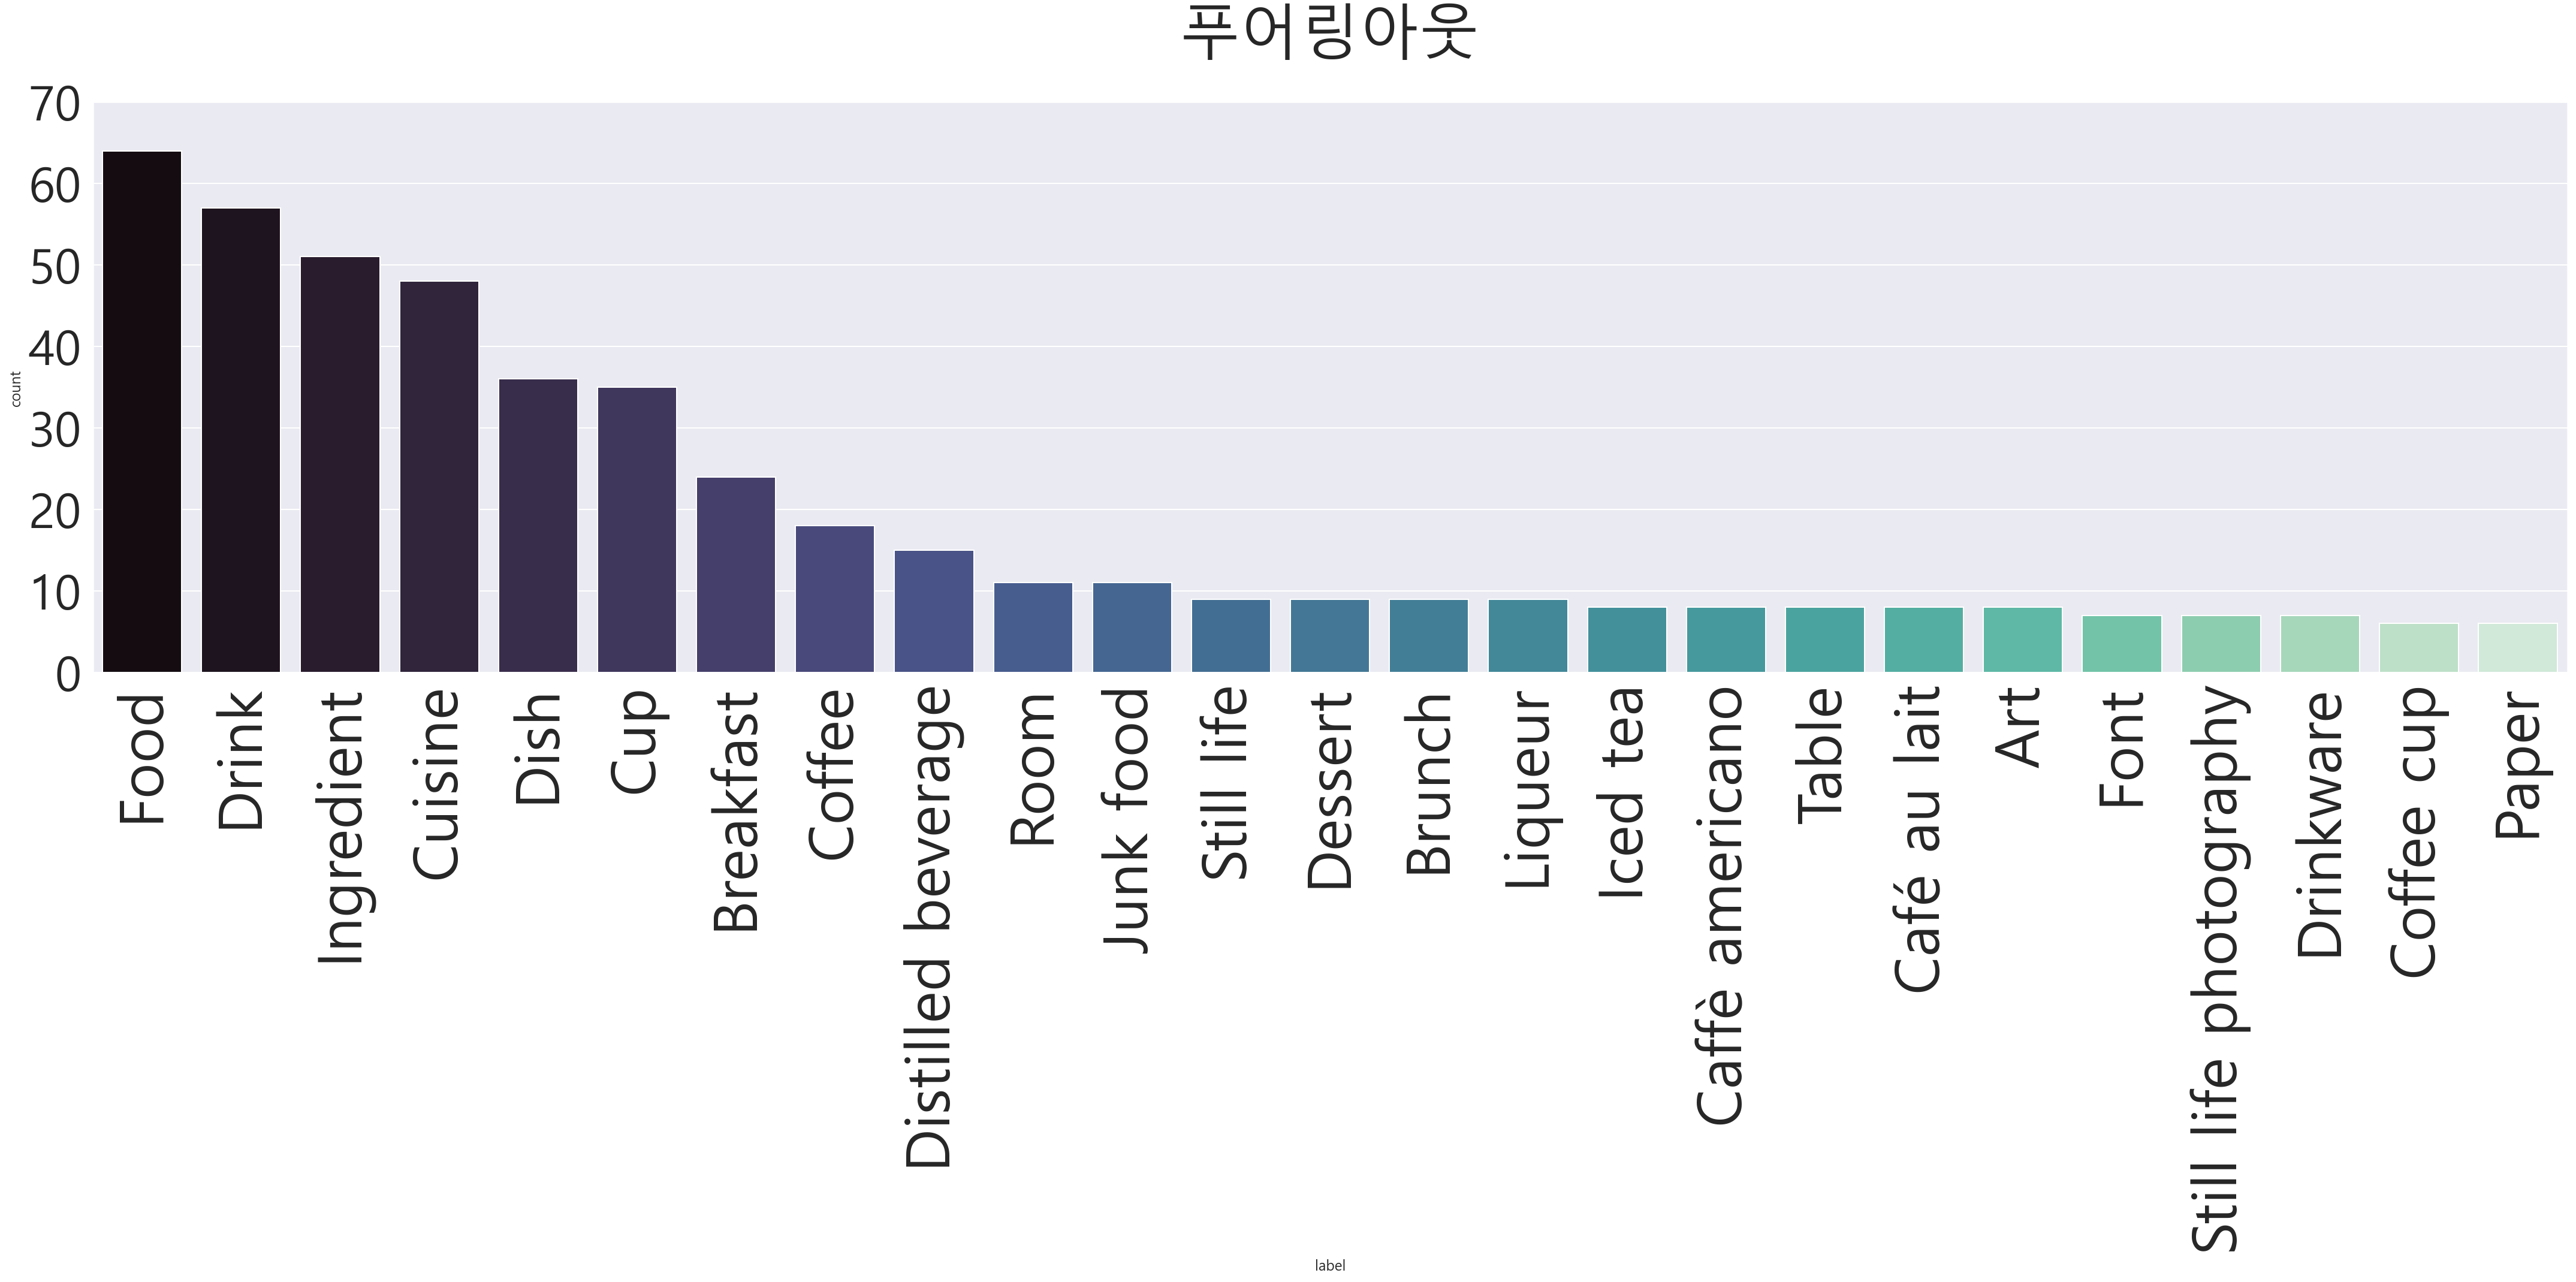

In [30]:
get_imgkeyword('푸어링아웃','푸어링아웃')
label_gr.to_csv('C:\\Code\\5.1 [크롤링 프로젝트]\\csv\푸어링아웃_rank.csv')